# Road Traffic Accidents Severity Classification

![](road_traffic.jpg)

## Problem Description

Every year the lives of approximately 1.3 million people are cut short as a result of a road traffic crash. Between 20 and 50 million more people suffer non-fatal injuries, with many incurring a disability as a result of their injury.

Road traffic injuries cause considerable economic losses to individuals, their families, and to nations as a whole. These losses arise from the cost of treatment as well as lost productivity for those killed or disabled by their injuries, and for family members who need to take time off work or school to care for the injured.
This data set is collected from Addis Ababa Sub-city police departments for master's research work. The data set has been prepared from manual records of road traffic accidents of the year 2017-20. All the sensitive information has been excluded during data encoding and finally it has 32 features and 12316 instances of the accident. Then it is preprocessed and for identification of major causes of the accident by analyzing it using different machine learning classification algorithms. 

## 1. Loading The Libraries

In [1]:
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Data Exploration and  Preprocessing

In [2]:
df = pd.read_csv('dataset.csv')

#### What are the dimensions of the dataset?

In [3]:
df.shape

(12316, 32)

There are 12,316 records and 32 attributes

In [4]:
# Reading first few records of the dataset
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [5]:
# List of all the columns
list(df)

['Time',
 'Day_of_week',
 'Age_band_of_driver',
 'Sex_of_driver',
 'Educational_level',
 'Vehicle_driver_relation',
 'Driving_experience',
 'Type_of_vehicle',
 'Owner_of_vehicle',
 'Service_year_of_vehicle',
 'Defect_of_vehicle',
 'Area_accident_occured',
 'Lanes_or_Medians',
 'Road_allignment',
 'Types_of_Junction',
 'Road_surface_type',
 'Road_surface_conditions',
 'Light_conditions',
 'Weather_conditions',
 'Type_of_collision',
 'Number_of_vehicles_involved',
 'Number_of_casualties',
 'Vehicle_movement',
 'Casualty_class',
 'Sex_of_casualty',
 'Age_band_of_casualty',
 'Casualty_severity',
 'Work_of_casuality',
 'Fitness_of_casuality',
 'Pedestrian_movement',
 'Cause_of_accident',
 'Accident_severity']

#### Description of the Attributes

- time : time of the accident
- day_of_week : the day in which accident took place
- age_band_of_driver : the age bracket of the driver
- sex_of_driver : gender of the driver involved
- driving_experience : how experienced was the driver
- type of vehicle : what type of vehicle was involved
- owner of vehicle : who owned the vehicle?
- type_of_junction : what was the tpye of junction(Y-junction/T-Junction/U Turn/O-Junction)
- road_surface_type : what was the type of road(asphalt/gravel)

#### Datatypes of the Columns?

In [6]:
df.dtypes

Time                           object
Day_of_week                    object
Age_band_of_driver             object
Sex_of_driver                  object
Educational_level              object
Vehicle_driver_relation        object
Driving_experience             object
Type_of_vehicle                object
Owner_of_vehicle               object
Service_year_of_vehicle        object
Defect_of_vehicle              object
Area_accident_occured          object
Lanes_or_Medians               object
Road_allignment                object
Types_of_Junction              object
Road_surface_type              object
Road_surface_conditions        object
Light_conditions               object
Weather_conditions             object
Type_of_collision              object
Number_of_vehicles_involved     int64
Number_of_casualties            int64
Vehicle_movement               object
Casualty_class                 object
Sex_of_casualty                object
Age_band_of_casualty           object
Casualty_sev

Only Number_of_vehicles and Number_of_causalties are integer type which clearly indicates the other are categorical features

#### Summary Statistics

In [7]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


We observe the there are only **Two Numerical Features:**
- Number_of_vehicles_involved
- Number_of_causalities

All the other **30 columns are Categorical in nature**

On an average the number of vehicles involved is 2 and the number of causalities is 1

The maximum number of causalities is 7 and the maximum number of vehicles involved is 8

#### Analyzing the missing data

In [8]:
df.isnull().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

We can notice that **Defect_of_vehicle** and the **Service_year_of_vehicle** have the highest missing values

#### Percentage of Missing Data

In [9]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df = missing_value_df.reset_index()

In [10]:
missing_value_df = missing_value_df.drop(['column_name'],axis = 1)

In [11]:
missing_value_df.columns = ['column_name','percent_missing']

In [12]:
missing_value_df.sort_values(by = 'percent_missing',ascending = False,inplace= True)
missing_value_df.reset_index(inplace = True)

### Top 5 columns with most missing values

In [13]:
missing_value_df.head()

,index,column_name,percent_missing
0,10,Defect_of_vehicle,35.945112
1,9,Service_year_of_vehicle,31.893472
2,27,Work_of_casuality,25.966223
3,28,Fitness_of_casuality,21.394933
4,7,Type_of_vehicle,7.713543


### Handling Missing Data for Numerical Features

**Box Plot Analysis**

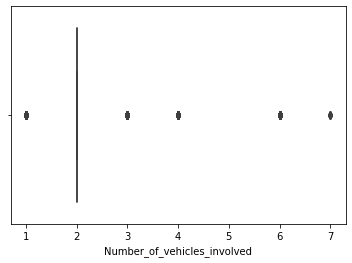

In [14]:
sns.boxplot(x = df['Number_of_vehicles_involved'])

C:\Users\Vedanth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


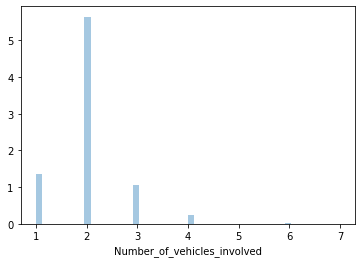

In [15]:
sns.distplot(df['Number_of_vehicles_involved'])

In [16]:
df.skew(axis=0)

Number_of_vehicles_involved    1.323454
Number_of_casualties           2.344769
dtype: float64

The data is heavily skewed for number of vehicles involed. So we can impute by median

In [17]:
df['Number_of_vehicles_involved'].unique()

array([2, 1, 3, 6, 4, 7], dtype=int64)

None of the numerical features have missing values so we dont have to impute

### Number of Unique Classes for Categorical Features

In [18]:
df.describe(include='object')

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
count,12316,12316,12316,12316,11575,11737,11487,11366,11834,8388,...,12008,12316,12316,12316,12316,9118,9681,12316,12316,12316
unique,1074,7,5,3,7,4,7,17,4,6,...,13,4,3,6,4,7,5,9,20,3
top,15:30:00,Friday,18-30,Male,Junior high school,Employee,5-10yr,Automobile,Owner,Unknown,...,Going straight,Driver or rider,Male,na,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
freq,120,2041,4271,11437,7619,9627,3363,3205,10459,2883,...,8158,4944,5253,4443,7076,5903,9608,11390,2263,10415


#### What are the unique classes for the Classification Features of the Dataset?

In [19]:
for col in df:
    print(f'{col}: {df[col].unique()}')
    print("***********************************")

Time: ['17:02:00' '1:06:00' '14:15:00' ... '7:24:00' '19:18:00' '2:47:00']
***********************************
Day_of_week: ['Monday' 'Sunday' 'Friday' 'Wednesday' 'Saturday' 'Thursday' 'Tuesday']
***********************************
Age_band_of_driver: ['18-30' '31-50' 'Under 18' 'Over 51' 'Unknown']
***********************************
Sex_of_driver: ['Male' 'Female' 'Unknown']
***********************************
Educational_level: ['Above high school' 'Junior high school' nan 'Elementary school'
 'High school' 'Unknown' 'Illiterate' 'Writing & reading']
***********************************
Vehicle_driver_relation: ['Employee' 'Unknown' 'Owner' nan 'Other']
***********************************
Driving_experience: ['1-2yr' 'Above 10yr' '5-10yr' '2-5yr' nan 'No Licence' 'Below 1yr'
 'unknown']
***********************************
Type_of_vehicle: ['Automobile' 'Public (> 45 seats)' 'Lorry (41?100Q)' nan
 'Public (13?45 seats)' 'Lorry (11?40Q)' 'Long lorry' 'Public (12 seats)'
 'Taxi' 'Pick 

Since accident severity is our target variable and there are three classes, we are dealing with a multi class problem here.

The prominent classes are : 
- Slight Injury
- Serious Injury
- Fatal Injury

### Handling Missing Values for Categorical Variables

In [20]:
df['Types_of_Junction'].mode()

0    Y Shape
dtype: object

Mode of Types of Junction is Y - Shape

Similarly we can find the mode for the other features

**Replacing different wordings for Null values by NaN**

In [21]:
for column in df.columns:
    df[column].mask(df[column] == 'na', 'NaN', inplace=True)

In [22]:
for column in df.columns:
    df[column].replace('NaN',df[column].mode()[0], inplace=True)

In [23]:
df['Fitness_of_casuality'].mode()[0]

'Normal'

In [24]:
df['Fitness_of_casuality'] = df['Fitness_of_casuality'].fillna(df['Fitness_of_casuality'].mode()[0])

In [25]:
df['Age_band_of_casualty'].replace('NaN','18-30', inplace=True)

In [26]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


#### Is there class imbalance in the data?

In [27]:
df["Accident_severity"].value_counts()

Slight Injury     10415
Serious Injury     1743
Fatal injury        158
Name: Accident_severity, dtype: int64

Yes there is class imbalance because Slight Injury Class has 10,000 odd values whereas the other two classes have only 1743 and 158 values. 

Let's deal with class imbalance a little later but keep this point in mind

### Analysis of Time Column 

### Categorizing Time Values

In this section,let's bin time values into `Morning`,`Afternoon`,`Evening` and `Night` classes

In [28]:
df = df.reset_index()

In [29]:
df

,index,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [30]:
df.drop('index',axis = 1)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Overtaking,Slight Injury
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury


In [31]:
df['Hours'] = pd.to_datetime(df['Time'],format = '%H:%M:%S').dt.hour

In [32]:
df['Hours'].unique()

array([17,  1, 14, 22,  8, 15, 12, 18, 13, 20, 16, 21,  9, 10, 19, 11, 23,
        7,  0,  5,  6,  4,  3,  2], dtype=int64)

In [33]:
bins = ['0','12','15','20','23']
names = ['Morning','Afternoon','Evening','Night']

df['Time_of_day'] = pd.cut(df['Hours'],bins,labels = names)

In [34]:
df[['Hours','Time_of_day']]

,Hours,Time_of_day
0,17,Evening
1,17,Evening
2,17,Evening
3,1,Morning
4,1,Morning
...,...,...
12311,16,Evening
12312,18,Evening
12313,13,Afternoon
12314,13,Afternoon


## Group By Batchwise Analysis

In [35]:
df_group_by_time = df.groupby('Time_of_day')

**Mean Number of Vehicles Involed and Causalities Grouped By Time_Of_Occurence**

In [36]:
df_group_by_time = df.groupby('Time_of_day').mean()

In [37]:
df_group_by_time.drop(['Hours'],axis = 1)

,index,Number_of_vehicles_involved,Number_of_casualties
Time_of_day,,,
Morning,6101.283714,2.043568,1.585581
Afternoon,6291.456893,2.060394,1.583807
Evening,6236.629638,2.044212,1.565208
Night,5858.118577,2.030632,1.694664


### Cross Tab and Pivot Analysis

In [38]:
pd.crosstab(df["Time_of_day"],df['Cause_of_accident']).max()

Cause_of_accident
Changing lane to the left               537
Changing lane to the right              661
Driving at high speed                    75
Driving carelessly                      520
Driving to the left                     106
Driving under the influence of drugs    122
Drunk driving                             7
Getting off the vehicle improperly       69
Improper parking                          7
Moving Backward                         428
No distancing                           783
No priority to pedestrian               268
No priority to vehicle                  471
Other                                   160
Overloading                              17
Overspeed                                30
Overtaking                              158
Overturning                              42
Turnover                                 31
Unknown                                   9
dtype: int64

No distancing maintained between the pedestrian and the vehicle is the main cause of the accident with more than 700 occurences

Each value generated is the frequency count with which each of these would show up in the dataset

## 3. Exploratory Data Analysis

In [39]:
df

,index,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hours,Time_of_day
0,0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,...,Male,18-30,3,NaN,Normal,Not a Pedestrian,Moving Backward,Slight Injury,17,Evening
1,1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,...,Male,18-30,3,NaN,Normal,Not a Pedestrian,Overtaking,Slight Injury,17,Evening
2,2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the left,Serious Injury,17,Evening
3,3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,...,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury,1,Morning
4,4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,...,Male,18-30,3,NaN,Normal,Not a Pedestrian,Overtaking,Slight Injury,1,Morning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,16,Evening
12312,12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury,18,Evening
12313,12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,...,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury,13,Afternoon
12314,12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,...,Male,18-30,3,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury,13,Afternoon


In [52]:
df.drop('index',axis = 1,inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D76FF46190>,
      dtype=object)

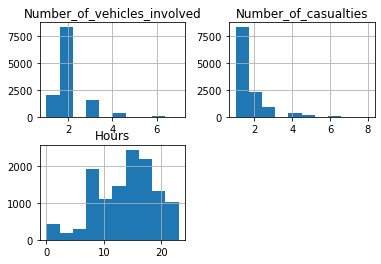

In [53]:
df.hist()

**Does the numerical feature follow normal distribution?**

C:\Users\Vedanth\anaconda3\lib\site-packages\seaborn\distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


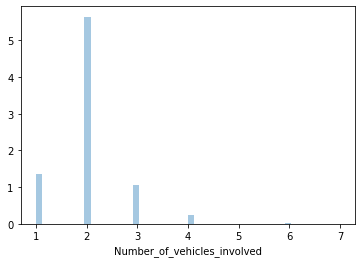

In [54]:
sns.distplot(df['Number_of_vehicles_involved'],kde = True)

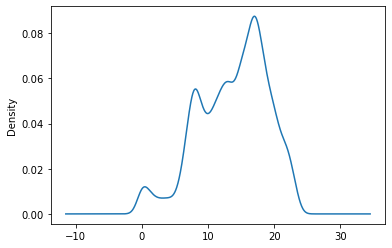

In [55]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Hours'].plot(kind='kde', ax=ax)
# df["Number_of_vehicles_involved"].plot(kind='kde', ax=ax, color='red')

#### QQ Plot Analysis

((array([-3.8617944 , -3.63945684, -3.51752013, ...,  3.51752013,
          3.63945684,  3.8617944 ]),
  array([1, 1, 1, ..., 7, 7, 7], dtype=int64)),
 (0.5895910465603204, 2.0406787918155245, 0.8557623242858671))

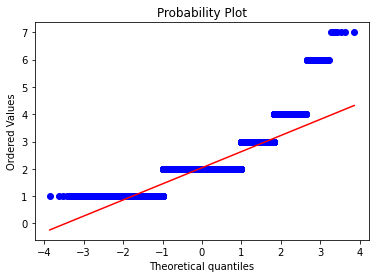

In [56]:
import scipy.stats as stats
import pylab 

stats.probplot(df['Number_of_vehicles_involved'], dist="norm", plot=pylab)

We can clearly observe that the values are not normally distributed

### Analysis of Categorical Features

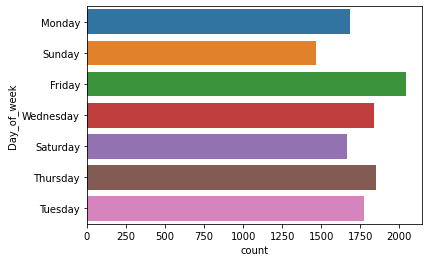

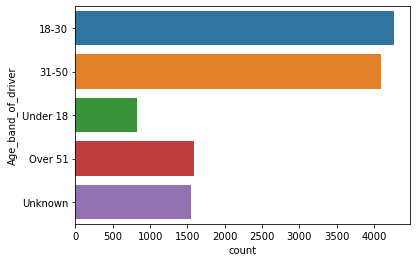

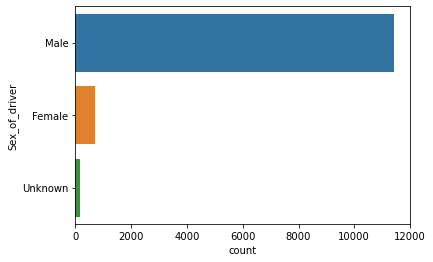

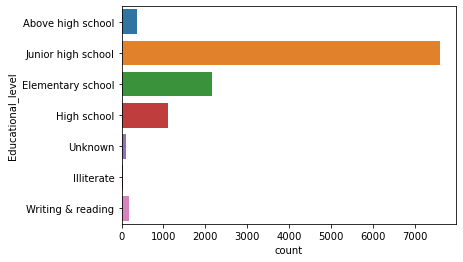

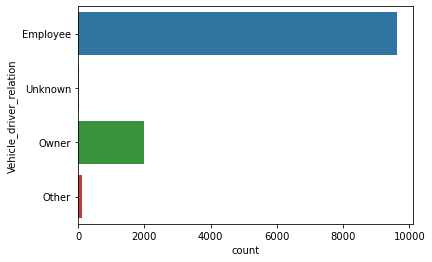

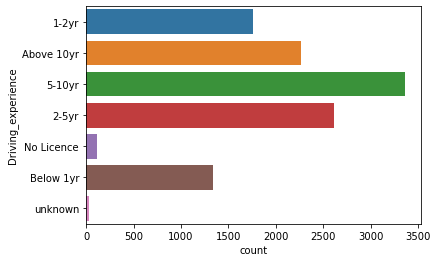

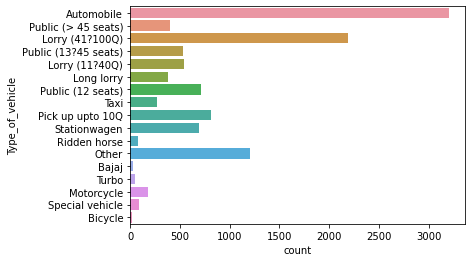

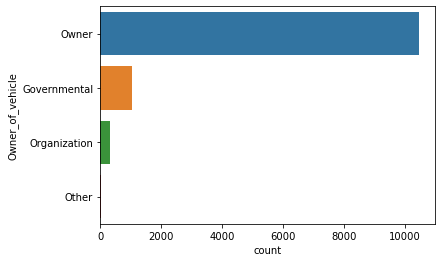

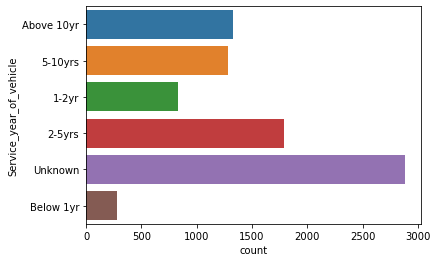

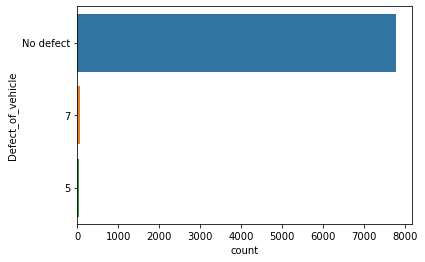

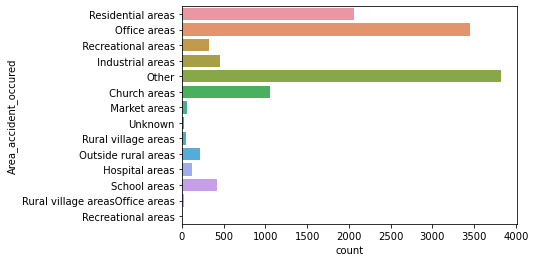

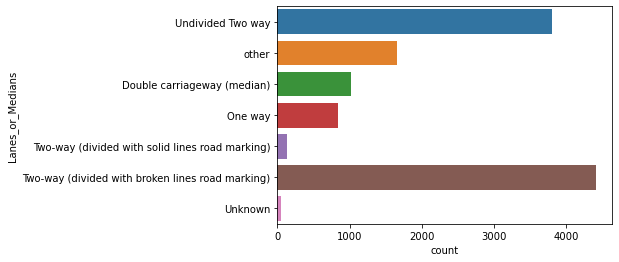

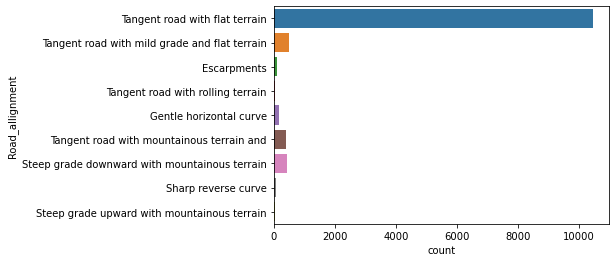

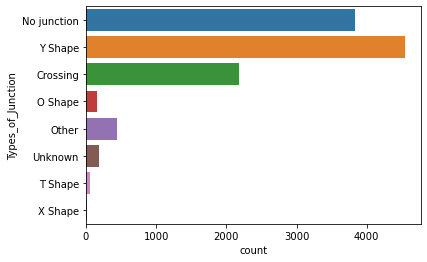

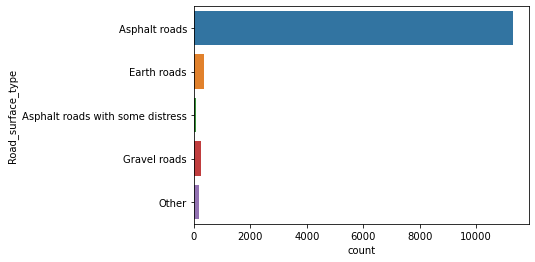

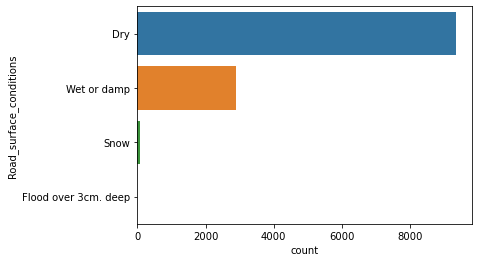

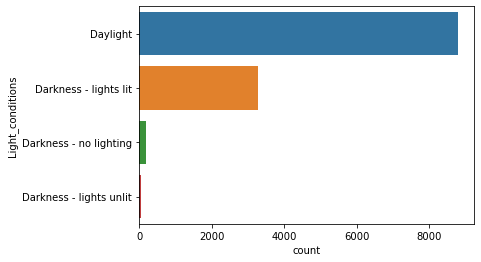

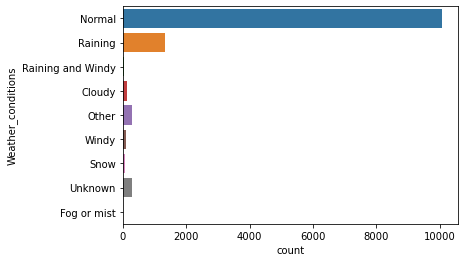

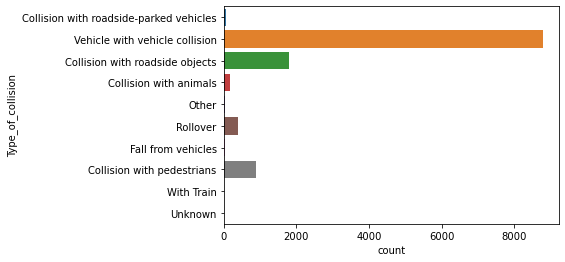

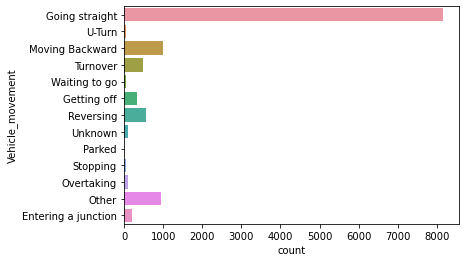

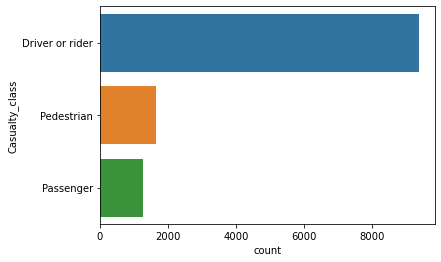

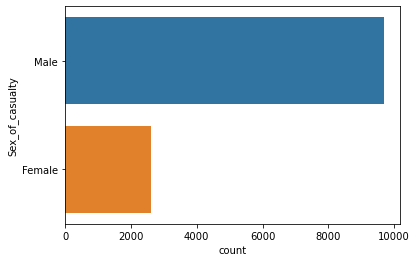

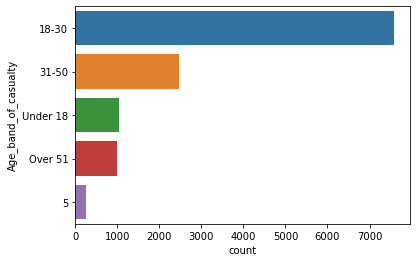

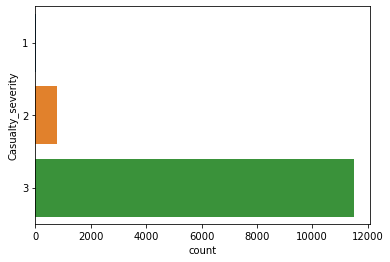

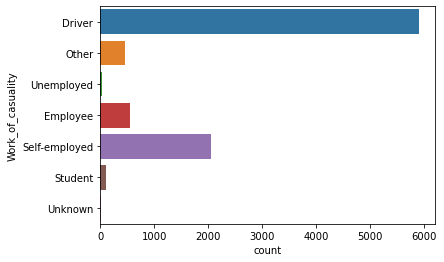

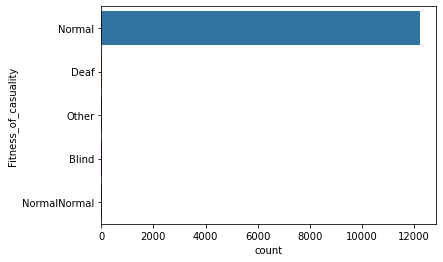

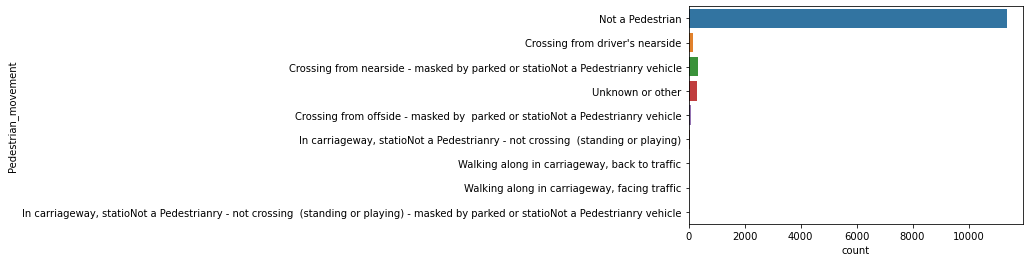

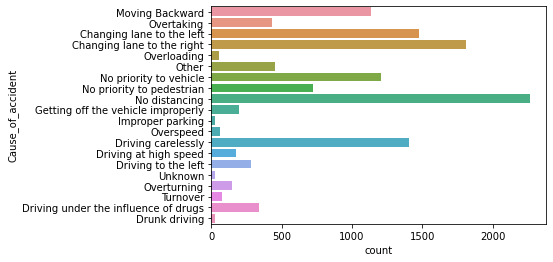

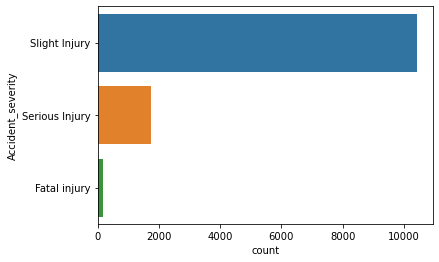

In [57]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 22:
        sns.countplot(y=col, data=df)
        plt.show()


### Observations

- Friday has the most number of accidents closely followed by Thursdays

- Most of the drivers are in the range of 18-30 and 31-50 years

- More than 3000 accidents are caused by automobiles followed by Lorry 

- Most of the accidents(close to 3250) are caused by the drivers in the experience level of 5-10 years

 

- More than 7000 accidents / 130000 accidents are caused by drivers who are Junior high school grads.

- More than 11000 observations have Male Drivers who caused the accident. This also indicates class imbalance in the dataset

- Not maintaining distance between vehicle and pedestrian has caused the most accidents caused by sudden lane changes

- More than 10000 accidents are caused when the owner of the vehicle was riding

- More than 7000 accidents accur in the evening

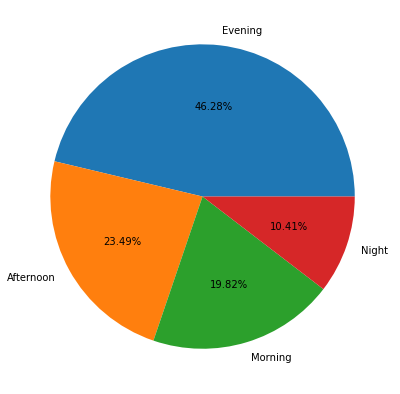

In [58]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Time_of_day'].value_counts().values,
        labels=df['Time_of_day'].value_counts().index,
        autopct='%2.2f%%')
plt.show()

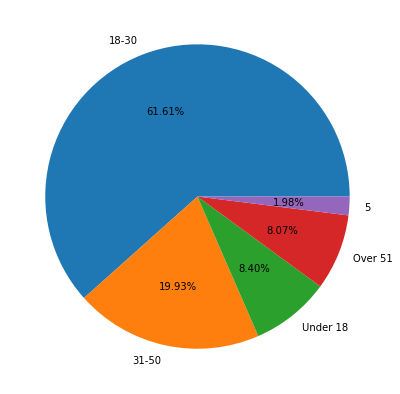

In [59]:
plt.figure(figsize=(10,7))
plt.pie(x=df['Age_band_of_casualty'].value_counts().values,
        labels=df['Age_band_of_casualty'].value_counts().index,
        autopct='%2.2f%%',pctdistance = 0.6)
plt.show()

### Pair Plot Bivariate Analysis

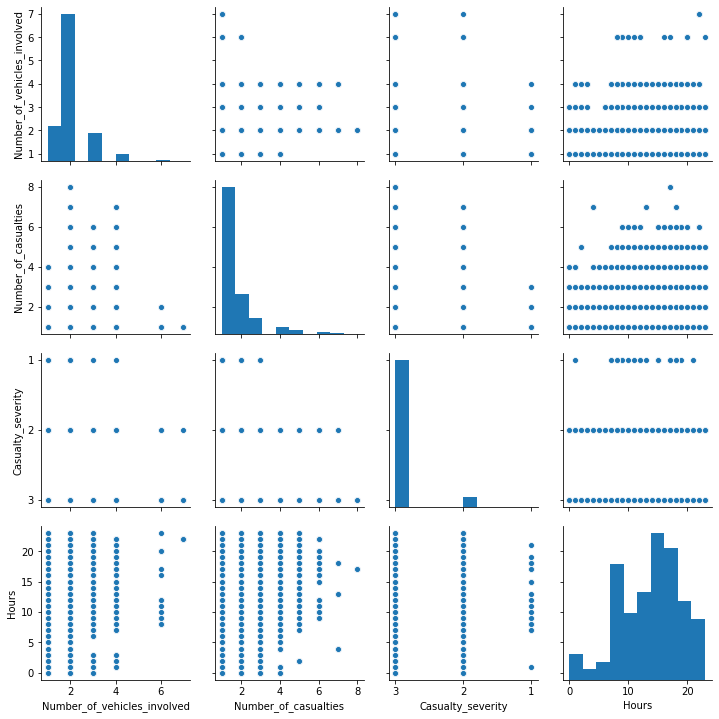

In [60]:
sns.pairplot(data = df)

**Obervation** : No noticeable conclusion can be drawn from the pairplots

### Correlation Analysis and Heatmaps

In [61]:
corr = df.corr()
corr

,Number_of_vehicles_involved,Number_of_casualties,Hours
Number_of_vehicles_involved,1.000000,0.213427,0.023095
Number_of_casualties,0.213427,1.000000,0.051761
Hours,0.023095,0.051761,1.000000


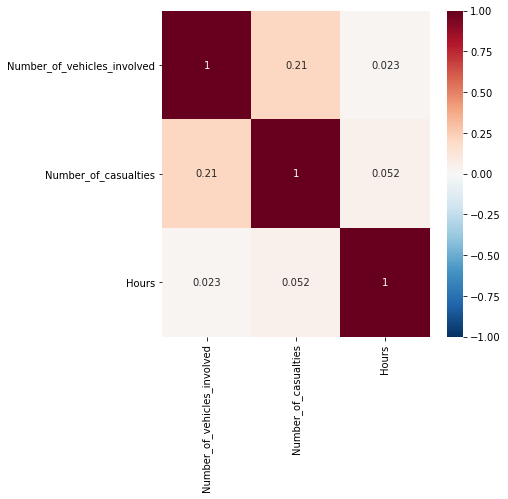

In [62]:
plt.figure(figsize=(6,6))
sns.heatmap(corr, cmap='RdBu_r', annot=True, vmax=1, vmin=-1)
plt.show()

**Observation** : None of the features are strongly corelated but we see a small corelation of 0.21 between no of causalities and no of vehicles involved in the accident

## Feature Selection and Feature Engineering

#### Correlation between Categorical Features

Usually One hot encoding for large number of categorical dimensions will lead to multi collinearity and hence let's keep it aside for now

### KBest Feature Selection

In [63]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from scipy.stats import kendalltau
from scipy.stats import chi2_contingency

In [64]:
label_encoder = LabelEncoder()

In [85]:
for column in df.columns:
    df[column].fillna(df[column].mode()[0], inplace=True)

In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype
---  ------                       --------------  -----
 0   Time                         12316 non-null  int32
 1   Day_of_week                  12316 non-null  int32
 2   Age_band_of_driver           12316 non-null  int32
 3   Sex_of_driver                12316 non-null  int32
 4   Educational_level            12316 non-null  int32
 5   Vehicle_driver_relation      12316 non-null  int32
 6   Driving_experience           12316 non-null  int32
 7   Type_of_vehicle              12316 non-null  int32
 8   Owner_of_vehicle             12316 non-null  int32
 9   Service_year_of_vehicle      12316 non-null  int32
 10  Defect_of_vehicle            12316 non-null  int32
 11  Area_accident_occured        12316 non-null  int32
 12  Lanes_or_Medians             12316 non-null  int32
 13  Road_allignment              12316 non-null  i

In [86]:
for column in df.columns:
    df[column].mask(df[column] == 'na', 'NaN', inplace=True)

In [87]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hours,Time_of_day
0,420,1,0,1,0,0,0,0,3,3,...,1,0,2,0,2,5,9,2,17,1
1,420,1,1,1,4,0,3,11,3,2,...,1,0,2,0,2,5,16,2,17,1
2,420,1,0,1,4,0,0,5,3,5,...,1,1,2,0,2,5,0,1,17,1
3,594,3,0,1,4,0,2,11,0,5,...,0,0,2,0,2,5,1,2,1,2
4,594,3,0,1,4,0,1,0,3,2,...,1,0,2,0,2,5,16,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,0,1,4,3,5,...,1,0,2,0,2,5,10,2,16,1
12312,476,3,4,1,1,0,2,0,3,5,...,1,0,2,0,2,5,10,2,18,1
12313,246,3,2,1,4,0,2,1,3,1,...,1,1,2,0,2,5,1,1,13,0
12314,246,3,0,0,4,0,3,5,3,1,...,1,0,2,0,2,5,5,2,13,0


In [88]:
df = df.apply(LabelEncoder().fit_transform)

In [89]:
df

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hours,Time_of_day
0,420,1,0,1,0,0,0,0,3,3,...,1,0,2,0,2,5,9,2,17,1
1,420,1,1,1,4,0,3,11,3,2,...,1,0,2,0,2,5,16,2,17,1
2,420,1,0,1,4,0,0,5,3,5,...,1,1,2,0,2,5,0,1,17,1
3,594,3,0,1,4,0,2,11,0,5,...,0,0,2,0,2,5,1,2,1,2
4,594,3,0,1,4,0,1,0,3,2,...,1,0,2,0,2,5,16,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,374,6,1,1,4,0,1,4,3,5,...,1,0,2,0,2,5,10,2,16,1
12312,476,3,4,1,1,0,2,0,3,5,...,1,0,2,0,2,5,10,2,18,1
12313,246,3,2,1,4,0,2,1,3,1,...,1,1,2,0,2,5,1,1,13,0
12314,246,3,0,0,4,0,3,5,3,1,...,1,0,2,0,2,5,5,2,13,0


In [90]:
X = df.drop(['Accident_severity'],axis = 1)

In [91]:
y = df['Accident_severity']

In [92]:
# Five features with highest chi-squared statistics are selected
chi2_features = SelectKBest(chi2, k = 5)
X_kbest_features = chi2_features.fit_transform(X, y)

In [93]:
cols = chi2_features.get_support(indices=True)
features_df_new = df.iloc[:,cols]

In [94]:
features_df_new.shape

(12316, 5)

### Different Correlation Co-Efficients Analysis

### Spearmann Correlation Coefficient 

In [95]:
df_spear = X.corr(method = 'spearman')

In [96]:
mask = np.triu(np.ones_like(X.corr()))

In [97]:
def display_correlation(df):
    r = df.corr(method="spearman")
    plt.figure(figsize=(32,32))
    heatmap = sns.heatmap(df_spear.corr(), vmin=-1, 
                      vmax=1, annot=True,mask = mask)
    plt.title("Spearman Correlation")
    return(r)

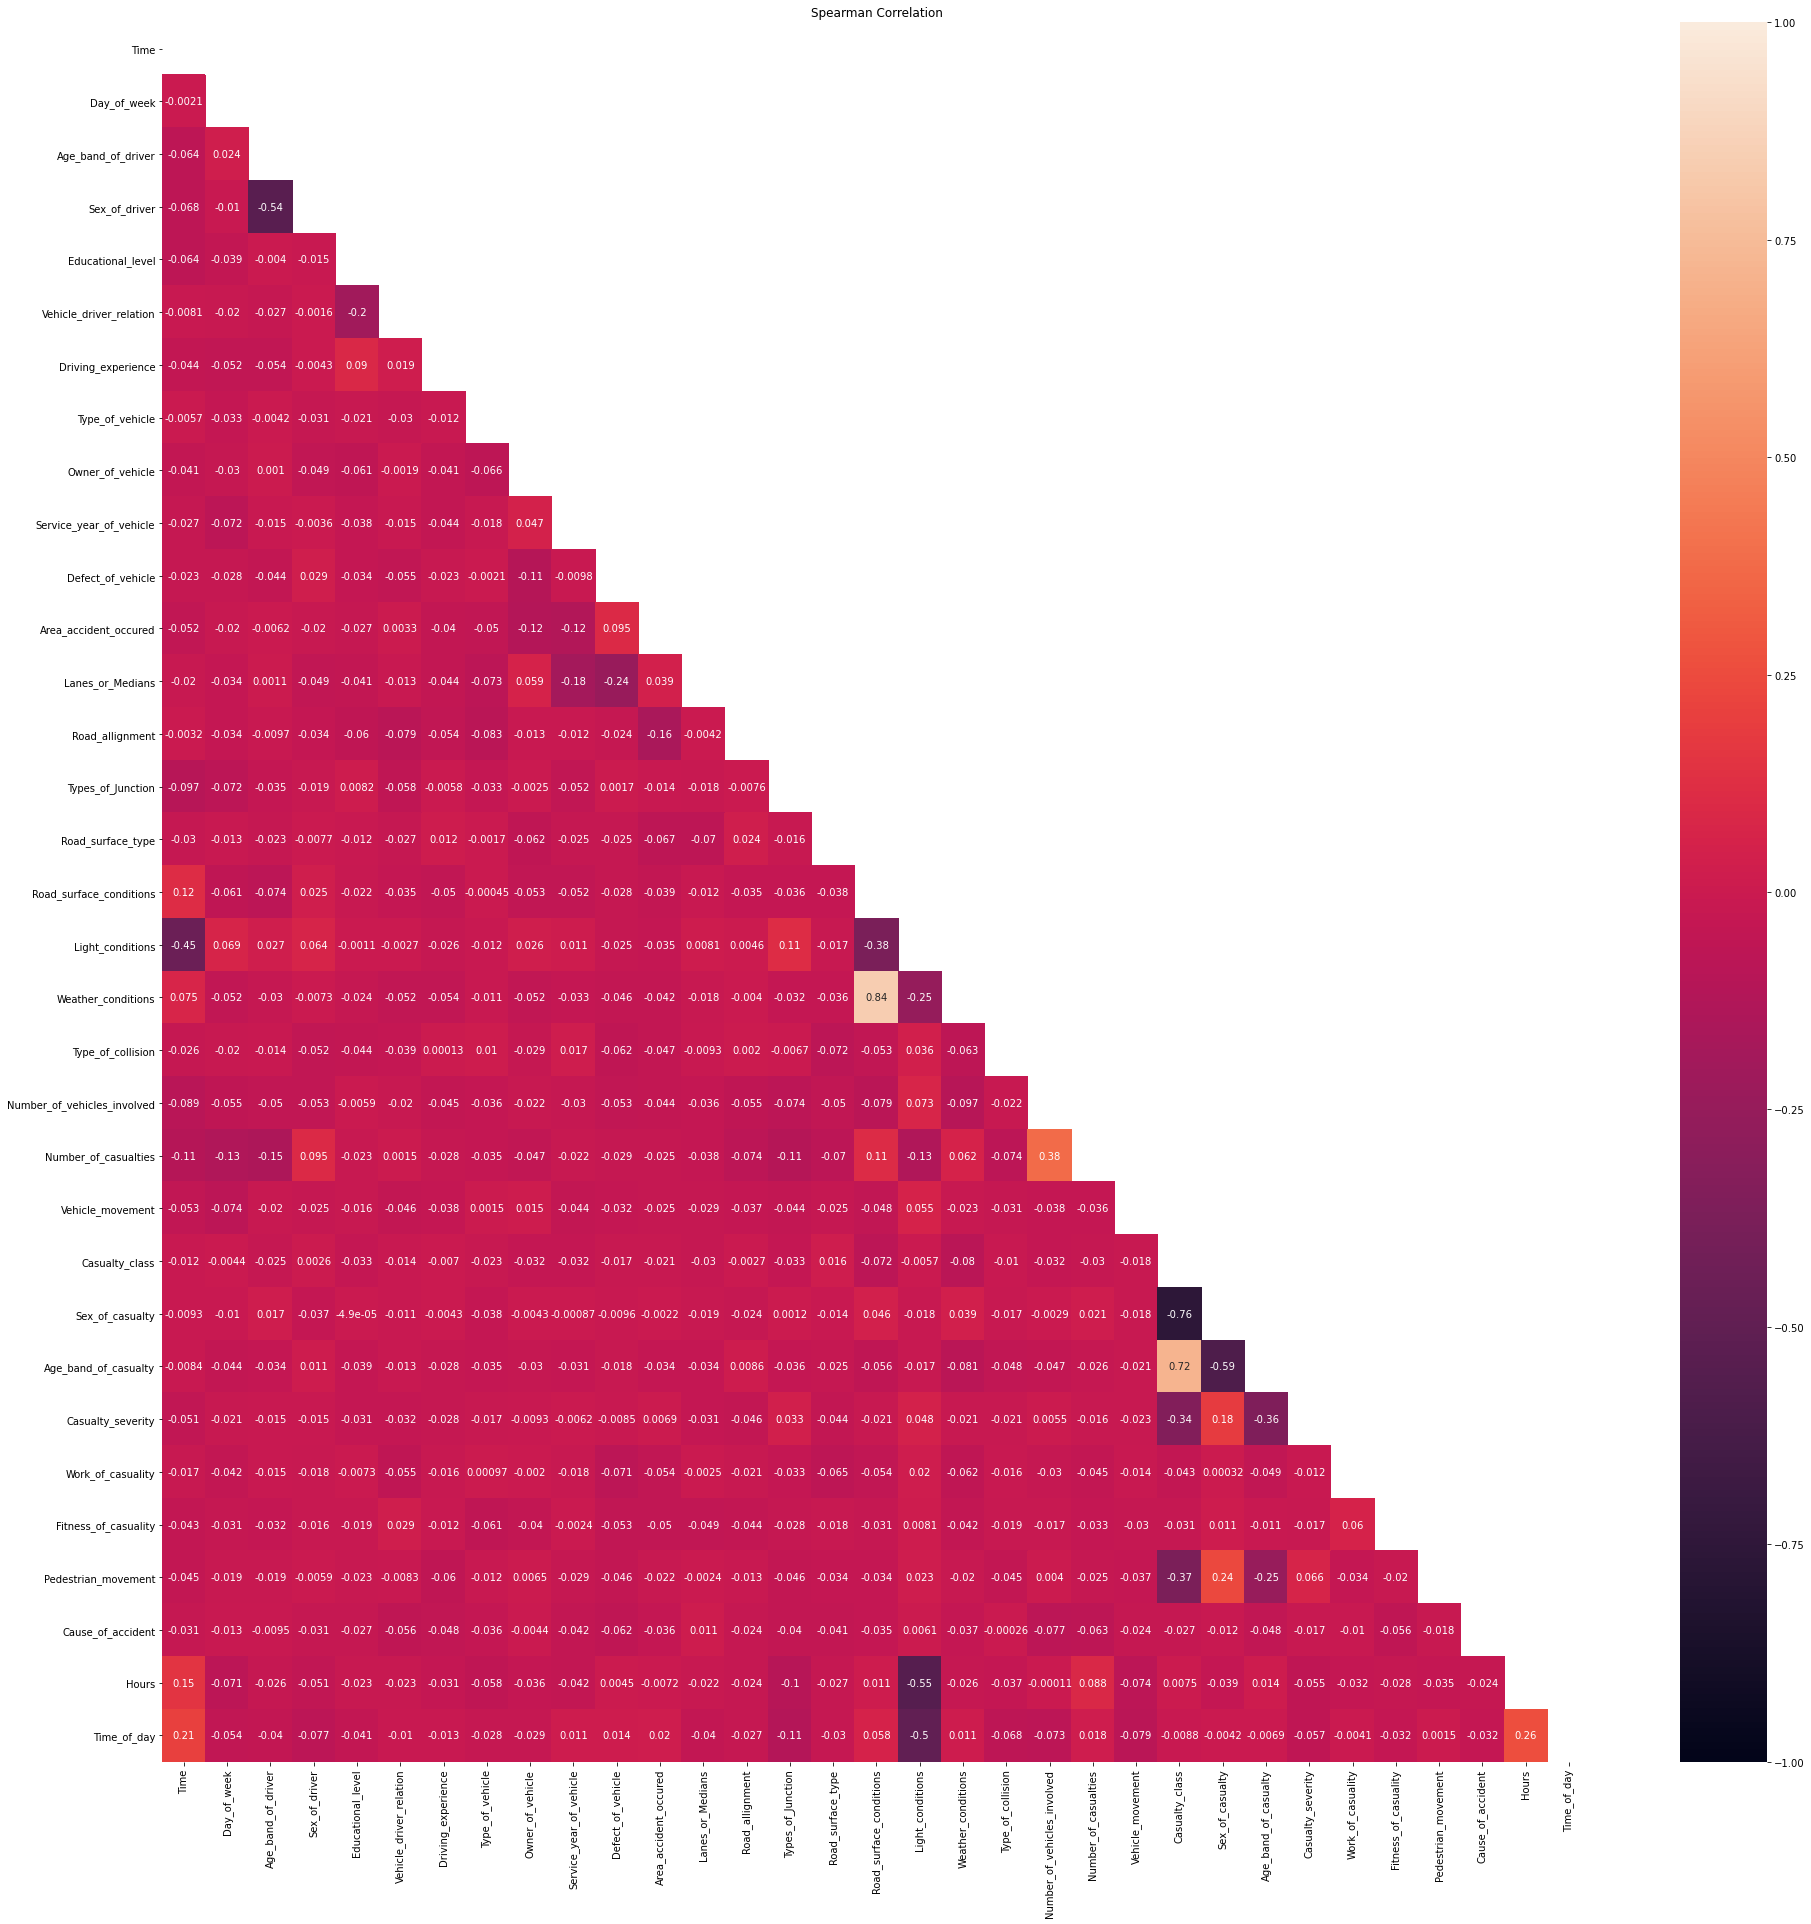

In [98]:
r_simple=display_correlation(df_spear)

Spearmann Coefficient is best suited when we have ordinal features but here we don not have any ordinal features, so let's use Kendall Coefficient

### Kendall Coefficient

In [99]:
df_kendall = X.corr(method = 'kendall')

In [100]:
mask = np.triu(np.ones_like(X.corr()))

In [101]:
def display_correlation(df):
    r = df.corr(method="kendall")
    plt.figure(figsize=(32,32))
    heatmap = sns.heatmap(df_kendall.corr(), vmin=-1, 
                      vmax=1, annot=True,mask = mask)
    plt.title("Kendall Correlation")
    return(r)

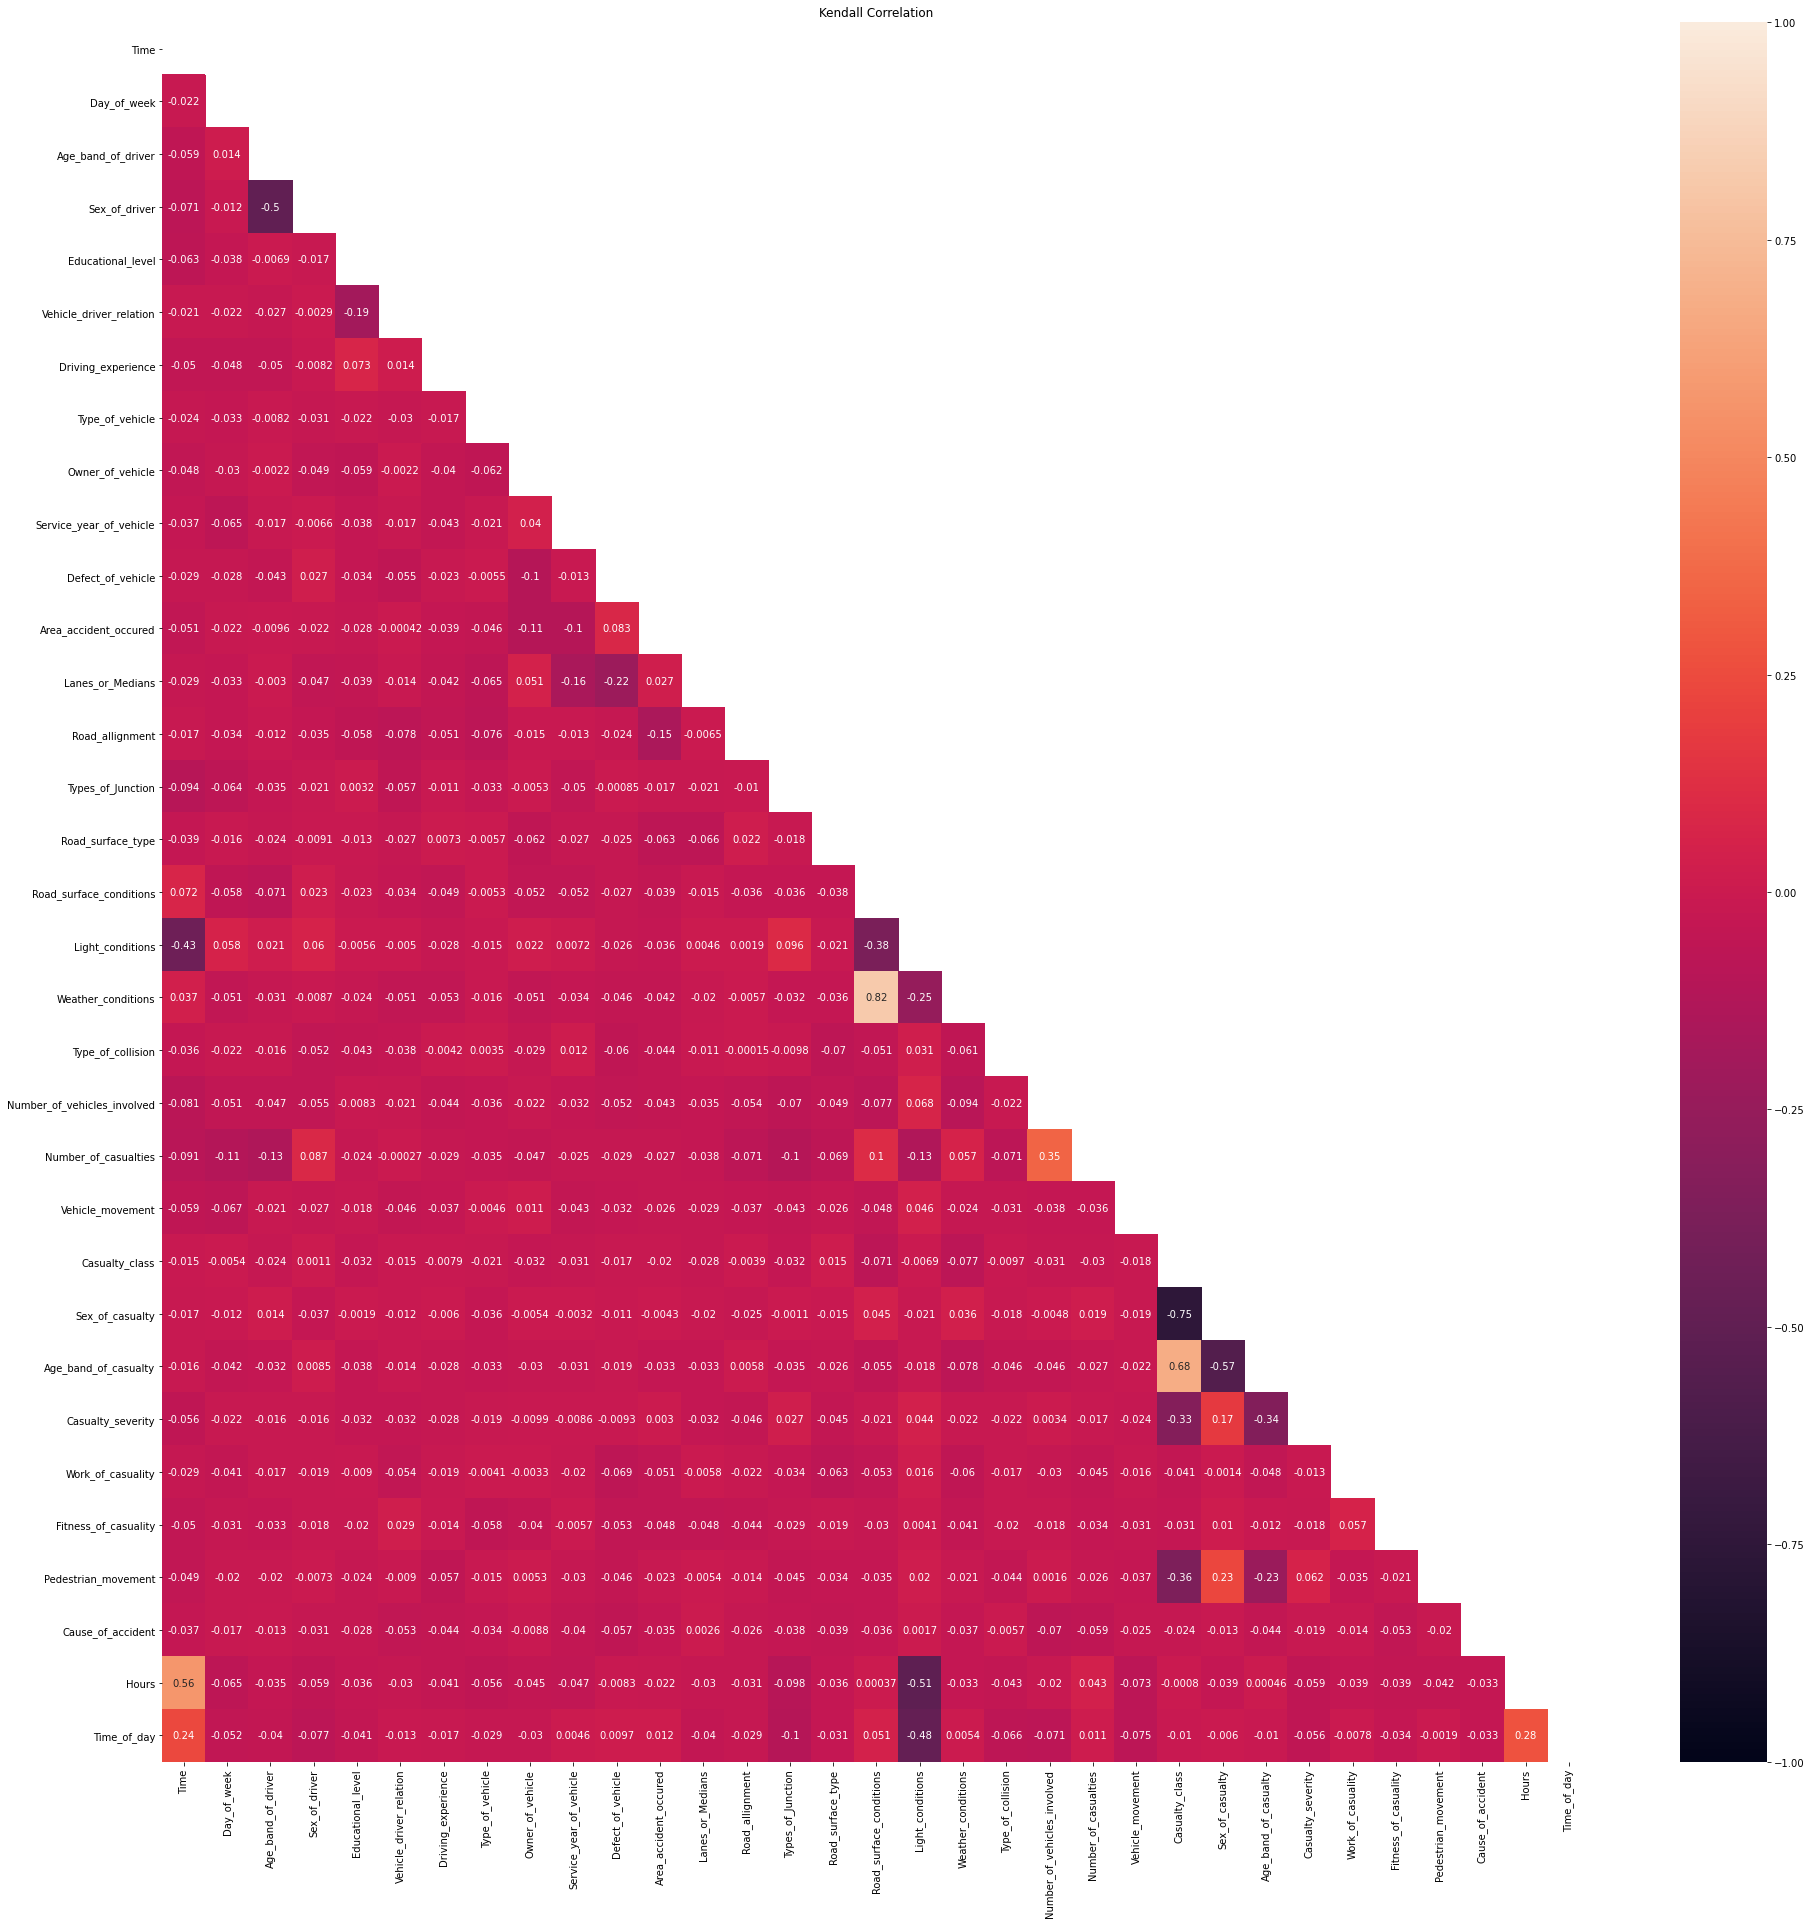

In [102]:
r_simple=display_correlation(df_kendall)

**Observations** : 
- `casualty_serverity`
- `sex_of_casualty`
- `Age_band` 
are closely associated to `casualty_class`

- `sex_of_casualty` and `casualty_severity`
- `sex_of_casualty` and `casualty_class`
are closesly related to each other

### Mutual Information

The mutual information measures the contribution of a variable towards another variable

MI is 0 if both the variables are independent and ranges between 0 –1 if X is deterministic of Y. MI is primarily the entropy of X

Advantage of MI : allows one to detect non-linear relationships and works for both regression and classification.

In [103]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectKBest

selector = SelectKBest(mutual_info_regression,k = 5)

In [104]:
X_train_new = selector.fit_transform(X,y)

In [105]:
mask = selector.get_support() # to get names of features selected

In [106]:
print(selector.scores_)

[0.         0.01009518 0.         0.00215171 0.00702883 0.00967157
 0.         0.0044364  0.00222707 0.00118256 0.         0.00241196
 0.00363732 0.         0.01326957 0.01156477 0.00813033 0.
 0.00797323 0.         0.         0.00873861 0.00115015 0.00850754
 0.         0.         0.01524498 0.01092823 0.00985531 0.00398433
 0.00520442 0.         0.00323418]


In [107]:
new_features = X.columns[mask]

In [108]:
print(new_features)

Index(['Day_of_week', 'Types_of_Junction', 'Road_surface_type',
       'Casualty_severity', 'Work_of_casuality'],
      dtype='object')


#### [TO DO]ANOVA Test

### Resampling Strategies For Imbalanced Dataset

**Why perform train test split before Resampling?**

**From Kaggle** : *A good question; if you are performing classification I would perform a stratified train_test_split to maintain the imbalance so that the test and train dataset have the same distribution, then never touch the test set again. Then perform any re-sampling only on the training data. (After all, the final validation data (or on kaggle, the Private dataset) that your model will receive will not be resampled). It is worth resampling the training data if for no other reason than to obtain a good evaluation metric. To be on the safe side also perhaps make use of a non-parametric estimator (RandomForest, XGBoost or the like).*


Always cross validate after resampling

#### How Imbalanced is the dataset?

In [109]:
target_count = df["Accident_severity"].value_counts()

In [110]:
target_count

2    10415
1     1743
0      158
Name: Accident_severity, dtype: int64

Class 0: 158
Class 1: 1743
Class 2: 10415


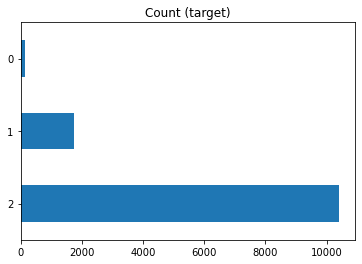

In [111]:
print('Class 0:', target_count[0])
print('Class 1:', target_count[1])
print('Class 2:',target_count[2])
# print('Proportion:', round(target_count[0] / target_count[1], 2), ': 1')

target_count.plot(kind='barh', title='Count (target)');

Clearly the proportion is more than 85:15 for all the three classes

So we will have to resample for better results

**Train Test Split**

In [112]:
from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

**How are our metrics performing**

In [115]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

In [116]:
model = XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [117]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 84.50%


A feature that should drastically reduce accuracy...

In [118]:
model.fit(X_train[['Educational_level']], y_train)
y_pred = model.predict(X_test[['Educational_level']])

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 83.69%


As we can see, the accuracy isnt reduced much so we cant use accuracy as a proper metric in this case

In [119]:
from sklearn.metrics import confusion_matrix

Confusion matrix:
 [[   0    0   57]
 [   0    0  606]
 [   0    0 3402]]


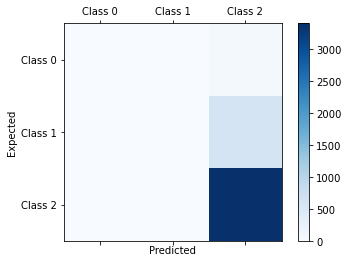

In [120]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
print('Confusion matrix:\n', conf_mat)

labels = ['Class 0', 'Class 1','Class 2']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

#### Handling Imbalance with SMOTE Over Sampling

2 d space plotting function

In [121]:
def plot_2d_space(X, y, label='Classes'):   
    colors = ['#1F77B4', '#FF7F0E','#00FF00']
    markers = ['o', 's','o']
    for l, c, m in zip(np.unique(y), colors, markers):
        plt.scatter(
            X[y==l, 0],
            X[y==l, 1],
            X[y==1, 2],
            c=c, label=l, marker=m
        )
    plt.title(label)
    plt.legend(loc='upper right')
    plt.show()

In [177]:
df.drop(['Time'],axis = 1)

,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,Defect_of_vehicle,...,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity,Hours,Time_of_day
0,1,0,1,0,0,0,0,3,3,2,...,1,0,2,0,2,5,9,2,17,1
1,1,1,1,4,0,3,11,3,2,2,...,1,0,2,0,2,5,16,2,17,1
2,1,0,1,4,0,0,5,3,5,2,...,1,1,2,0,2,5,0,1,17,1
3,3,0,1,4,0,2,11,0,5,2,...,0,0,2,0,2,5,1,2,1,2
4,3,0,1,4,0,1,0,3,2,2,...,1,0,2,0,2,5,16,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12311,6,1,1,4,0,1,4,3,5,2,...,1,0,2,0,2,5,10,2,16,1
12312,3,4,1,1,0,2,0,3,5,2,...,1,0,2,0,2,5,10,2,18,1
12313,3,2,1,4,0,2,1,3,1,2,...,1,1,2,0,2,5,1,1,13,0
12314,3,0,0,4,0,3,5,3,1,2,...,1,0,2,0,2,5,5,2,13,0
